# Reusing some earlier explored data for use as ingredients for basemap or cultural layers by others

In [5]:
print("test to see if kernal is working")

test to see if kernal is working


## Imports

In [55]:
### Various geospatial packages
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import rasterio
from rasterio.plot import show
from rasterio.warp import calculate_default_transform
from rasterio.warp import reproject, Resampling
from rasterio.plot import show

from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.mask import mask

from shapely.geometry import box
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

import os

In [56]:
### For working with PNG files
from PIL import Image
import numpy as np

In [57]:
from shapely.geometry import box
### this is the python package for relative elevation models for rivers
import riverrem

### OSX for open street map overpass data
import osmnx as ox

## Get shapefile for rivers and manipulate

In [9]:
# Specify the path to the shapefile
shp_flowlines_path = "../data/input_rem_data/NHDPlus12/NHDPlusTX/NHDPlus12/NHDSnapshot/Hydrography/NHDFlowline.shp"

# Load the shapefile using geopandas
gdf_flow = gpd.read_file(shp_flowlines_path)

<AxesSubplot:>

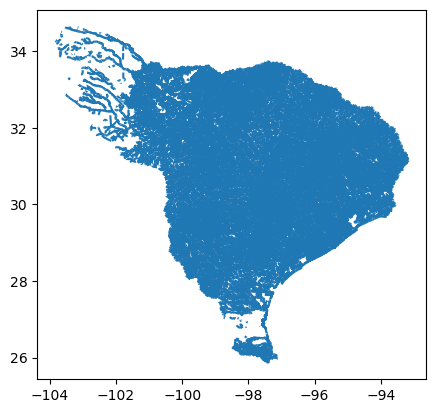

In [10]:
gdf_flow.plot()

### That's.... a lot. 
### Let's only get the flowlines we care about

In [11]:
gdf_flow[0:4]

,COMID,FDATE,RESOLUTION,GNIS_ID,GNIS_NAME,LENGTHKM,REACHCODE,FLOWDIR,WBAREACOMI,FTYPE,FCODE,SHAPE_LENG,ENABLED,GNIS_NBR,geometry
0,8333312,1999-06-25,Medium,None,None,0.723,08080206012159,Uninitialized,0,CanalDitch,33600,0.007254,True,0,"LINESTRING Z (-93.64348 29.95617 0.00000, -93...."
1,8332462,2000-06-07,Medium,None,None,6.833,08080206012160,Uninitialized,0,CanalDitch,33600,0.070591,True,0,"LINESTRING Z (-93.54474 30.02260 0.00000, -93...."
2,8333540,1999-06-25,Medium,None,None,8.773,08080206012161,Uninitialized,0,CanalDitch,33600,0.084409,True,0,"LINESTRING Z (-93.60120 29.99527 0.00000, -93...."
3,8333322,2008-06-13,Medium,542250,East Fork of Right Prong Black Bayou,2.064,08080206012162,With Digitized,0,StreamRiver,46006,0.020147,True,0,"LINESTRING Z (-93.62245 29.95131 0.00000, -93...."


In [12]:
gdf_flow.columns

Index(['COMID', 'FDATE', 'RESOLUTION', 'GNIS_ID', 'GNIS_NAME', 'LENGTHKM',
       'REACHCODE', 'FLOWDIR', 'WBAREACOMI', 'FTYPE', 'FCODE', 'SHAPE_LENG',
       'ENABLED', 'GNIS_NBR', 'geometry'],
      dtype='object')

In [13]:
unique_ftypes = gdf_flow['FTYPE'].unique()
print(unique_ftypes)

['CanalDitch' 'StreamRiver' 'ArtificialPath' 'Pipeline' 'Connector'
 'Coastline']


In [14]:
# Set the print options
np.set_printoptions(threshold=np.inf)

unique_ftypes = gdf_flow['GNIS_NAME'].unique()
print(unique_ftypes)

[None 'East Fork of Right Prong Black Bayou' 'Sabine River' 'Keys Creek'
 'Leatherman Creek' 'Franks Creek' 'Sandy Creek'
 'Cowleech Fork Sabine River' 'Timber Creek' 'Caddo Creek'
 'East Caddo Creek' 'West Caddo Creek' 'Elm Creek' 'Clendining Creek'
 'Brushy Creek' 'South Fork Sabine River' 'Sabine Creek' 'Mill Creek'
 'Crooked Creek' 'Chinguapin Branch' 'Grand Saline Creek' 'Dry Creek'
 'Village Creek' 'Big Creek' 'Block Branch' 'Briar Branch' 'Caney Creek'
 'Chrestman Branch' 'Coon Creek' 'Cottonwood Creek' 'Cowskin Creek'
 'Dodds Creek' 'Farber Creek' 'Giladon Creek' 'Long Branch'
 'Middle Caddo Creek' 'Renfro Creek' 'Simpkins Creek' 'Warren Branch'
 'Wolf Creek' 'Little Wolf Creek' 'Bearfield Branch' 'Bearpen Creek'
 "Bois d'Arc Creek" 'Glade Creek' 'Hickory Creek' 'Horse Creek'
 'McBee Creek' 'Pond Branch' 'Rock Creek' 'Tidwell Creek' 'Lankford Creek'
 'Wellon Creek' 'Davis Branch' 'Allread Creek' 'Spring Branch'
 'Bear Creek' 'Muscadine Branch' 'West Brushy Branch' 'Shuffle Cree

### Limiting shapefile to only river flowlines

In [15]:
gdf_flow_rivers = gdf_flow[gdf_flow['FTYPE'].isin(['StreamRiver','Coastline','Connector','ArtificialPath'])]
#gdf_flow_riversAndCoastline = gdf_flow_rivers[gdf_flow_rivers['GNIS_NAME'] != 'None']


<AxesSubplot:>

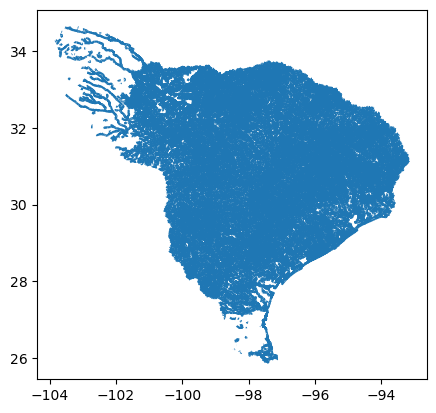

In [16]:
gdf_flow_rivers.plot()

### Shrinking to our area of interest

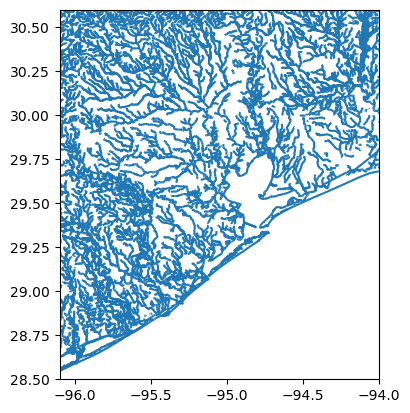

In [17]:
import matplotlib.pyplot as plt

# Define the x and y extents
xmin, xmax = -96.1, -94  # Adjust these values as needed
ymin, ymax = 28.5, 30.6    # Adjust these values as needed

# Plot the GeoDataFrame
ax = gdf_flow_rivers.plot()

# Set the x and y limits
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

# Show the plot
plt.show()

In [18]:
# Define the x and y extents
xmin, xmax = -96.1, -94  # Adjust these values as needed
ymin, ymax = 28.5, 30.6    # Adjust these values as needed

# Filter the GeoDataFrame using the bounding box
gdf_flow_rivers_limited = gdf_flow_rivers.cx[xmin:xmax, ymin:ymax]

<AxesSubplot:>

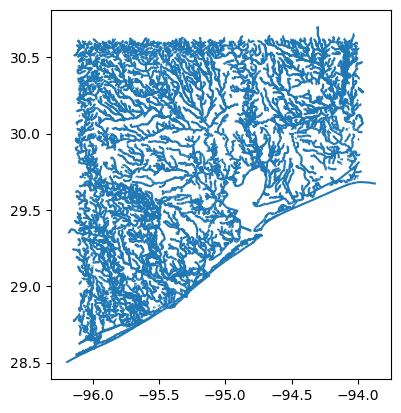

In [19]:
gdf_flow_rivers_limited.plot()

In [20]:
gdf_flow_rivers_limited.to_crs('EPSG:4326')
print(len(gdf_flow_rivers_limited))

7119


<AxesSubplot:>

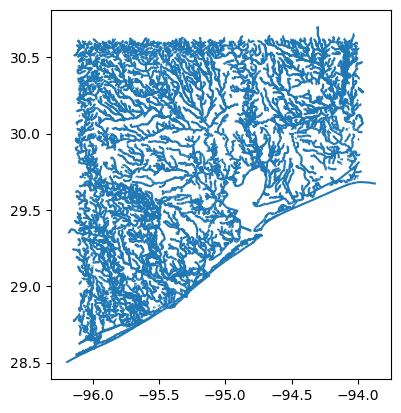

In [21]:
gdf_flow_rivers_limited.plot()

## Exploring a few TIFF files to see which one is an easy to understand DEM (digital elevation model) that might be useful as basemap

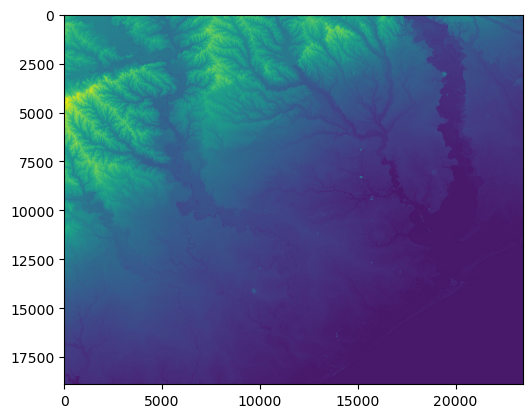

In [53]:
# Load the TIFF
with rasterio.open('../data/input_rem_data/v2/output_USGS10m_NoDataChangedToZero.tif') as src:
    img = src.read(1)  # read the first band
    
# Plot the TIFF
fig, ax = plt.subplots(1, 1)
show(img, ax=ax)
plt.show()

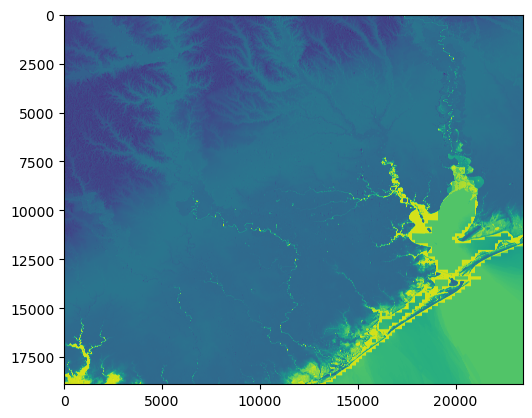

In [54]:
# Load the TIFF
with rasterio.open('../data/output_rem_data/v8/output_USGS10m_NoDataChangedToZero_hillshade-color.tif') as src:
    img = src.read(1)  # read the first band
    
# Plot the TIFF
fig, ax = plt.subplots(1, 1)
show(img, ax=ax)
plt.show()

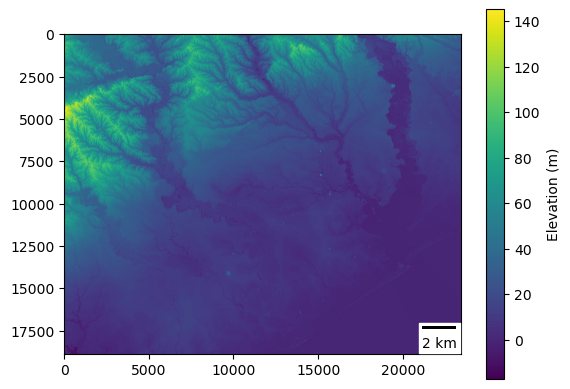

In [24]:
from matplotlib_scalebar.scalebar import ScaleBar

# Load the TIFF
with rasterio.open('../data/output_rem_data/v8/output_USGS10m_NoDataChangedToZero_REM.tif') as src:
    img = src.read(1)  # read the first band
    
# Plot the TIFF
fig, ax = plt.subplots(1, 1)
cax = ax.imshow(img, cmap='viridis')  # Use imshow to get the color mapping

# Add a color bar
cbar = fig.colorbar(cax, ax=ax, orientation='vertical')
cbar.set_label('Elevation (m)')  # Adjust the label as needed

show(img, ax=ax)

# Add a scalebar
scalebar = ScaleBar(1, units="m", dimension="si-length", location="lower right")
ax.add_artist(scalebar)

plt.show()

## Plotting the tiff and geodataframes all together to make sure they will work as cultural layers

In [58]:


# Load the TIFF
with rasterio.open('../data/output_rem_data/v8/output_USGS10m_NoDataChangedToZero_REM.tif') as src:
    # Reproject to EPSG:4326
    transform, width, height = calculate_default_transform(
        src.crs, 'EPSG:4326', src.width, src.height, *src.bounds)

    with rasterio.open('reprojected.tif', 'w', driver='GTiff', height=height, width=width, count=1, dtype=src.dtypes[0], crs='EPSG:4326', transform=transform) as reprojected:
        # Reproject the TIFF to EPSG:4326
        reproject(
            source=rasterio.band(src, 1),
            destination=rasterio.band(reprojected, 1),
            src_transform=src.transform,
            src_crs=src.crs,
            dst_transform=transform,
            dst_crs='EPSG:4326',
            resampling=Resampling.nearest)


# Load the clipped TIFF
with rasterio.open('reprojected.tif') as reprojected:
    img = reprojected.read(1)
    transform = src.transform

    # Clip the reprojected shapefile to the extent of the reprojected TIFF
    gdf_flow_rivers_limited = gdf_flow_rivers.cx[reprojected.bounds.left:reprojected.bounds.right, reprojected.bounds.bottom:reprojected.bounds.top]


# Get the bounds from the reprojected GeoDataFrame
bounds = reprojected.bounds

# Create a bounding box from the bounds
bbox = gpd.GeoDataFrame({'geometry': [box(*bounds)]}, crs=reprojected.crs)
# Reproject the bounding box to WGS84 (the CRS used by OpenStreetMap)
bbox = bbox.to_crs(epsg=4326)

# Get the bounding box coordinates
west, south, east, north = bbox.total_bounds

print("pounts on building box = ",north, south, east, west , "north, south, east, west ")
print("found points on bounding box")


# Define the filter
custom_filter = '["highway"~"motorway"]'

fine_customer_filter = '["highway"~"motorway|motorway_link|trunk|trunk_link|primary"]'

# Download the road network
G = ox.graph_from_bbox(north, south, east, west, network_type='drive', custom_filter=custom_filter)
G_fine = ox.graph_from_bbox(north, south, east, west, network_type='drive')

# Convert the road network to a GeoDataFrame
edges = ox.graph_to_gdfs(G, nodes=False, edges=True)

edges_fine = ox.graph_to_gdfs(G_fine, nodes=False, edges=True)

print("turned graph into geodataframe")

query = {'city': 'Houston'}
gdf_CityOfHoustonBoundary = ox.geocode_to_gdf(query)

# Reproject the GeoDataFrame to EPSG:4326
# edges = edges.to_crs('EPSG:4326')

# Clip the GeoDataFrame to the bounding box
# edges_clipped = gpd.clip(edges, bbox)

# Ensure the GeoDataFrame is in the same CRS
# gdf_flow_rivers_limited = gdf_flow_rivers.to_crs('EPSG:4326')

# Clip the GeoDataFrame to the bounding box
# gdf_flow_rivers_limited_clipped = gpd.clip(gdf_flow_rivers_limited, bbox)

# Plot the clipped TIFF and overlay the GeoDataFrame
# fig, ax = plt.subplots(1, 1)
# cax = ax.imshow(img, cmap='gray', extent=(xmin, xmax, ymin, ymax))

# Plot the reprojected TIFF
fig, ax = plt.subplots(1, 1, figsize=(20, 20))  # Adjust the size as needed
show(img, ax=ax, transform=transform, cmap='terrain')

# Add a color bar
# cbar = fig.colorbar(cax, ax=ax, orientation='vertical')
# cbar.set_label('Elevation (m)')

# Overlay the road network
# edges_clipped.plot(ax=ax, edgecolor='red', linewidth=1.1)  # Adjust color and linewidth as needed

gdf_CityOfHoustonBoundary.plot(ax=ax, color='purple', linewidth=2)

edges.plot(ax=ax, color='black', linewidth=2)  # Adjust color and linewidth as needed

edges_fine.plot(ax=ax, color='gray', linewidth=0.5)


# Overlay the GeoDataFrame with white lines and thinner width
# gdf_flow_rivers_limited_clipped.plot(ax=ax, edgecolor='blue', linewidth=0.5)
gdf_flow_rivers_limited.plot(ax=ax, color='blue', edgecolor='blue', linewidth=0.5)

# Add a scalebar
# scalebar = ScaleBar(1, units="m", dimension="si-length", location="lower right")
# ax.add_artist(scalebar)

plt.show()

pounts on building box =  30.599070763150337 28.850367107122846 -94.47500536682122 -96.64454234470855 north, south, east, west 
found points on bounding box


## Saving the geodataframes as shapefiles and the projected tif as a tif all in the same folder

First looking at the data to see if there might be any problems converting them into shapefiles

In [ ]:
edges[50:90]

osmid  \
u         v          key                                                      
222992457 304967192  0                                             20766885   
222992463 222996806  0                                            144867490   
          222994724  0                                             20767138   
222992478 1543229771 0                                             20766887   
222996741 222996806  0                                             20767358   
...                                                                     ...   
151430670 4230863652 0                                             15283615   
151430737 151430741  0                                             15283621   
151430741 152644901  0                                            123183307   
151431169 151431166  0                                             15283663   
          151459606  0    [46773419, 46773420, 99136945, 90248340, 12312...   

                          oneway lanes     ref  \
u         v          key                         
222992457 304967192  0      True   nan     NaN   
222992463 222996806  0      True     3    I 10   
          222994724  0      True   nan     NaN   
222992478 1543229771 0      True   nan     NaN   
222996741 222996806  0      True   nan     NaN   
...                          ...   ...     ...   
151430670 4230863652 0      True   nan     NaN   
151430737 151430741  0      True   nan     NaN   
151430741 152644901  0      True     4  TX 225   
151431169 151431166  0      True   nan    BW 8   
          151459606  0      True     4     SHT   

                                                    name        highway  \
u         v          key                                                  
222992457 304967192  0                               NaN  motorway_link   
222992463 222996806  0                     Interstate 10       motorway   
          222994724  0                               NaN  motorway_link   
222992478 1543229771 0                               NaN  motorway_link   
222996741 222996806  0                               NaN  motorway_link   
...                                                  ...            ...   
151430670 4230863652 0                               NaN  motorway_link   
151430737 151430741  0                               NaN  motorway_link   
151430741 152644901  0                  Pasadena Freeway       motorway   
151431169 151431166  0                               NaN  motorway_link   
          151459606  0    South Sam Houston Tollway East       motorway   

                         maxspeed reversed    length bridge  \
u         v          key                                      
222992457 304967192  0        NaN    False   315.433    NaN   
222992463 222996806  0     65 mph    False  1356.315    NaN   
          222994724  0        NaN    False   383.180    NaN   
222992478 1543229771 0        NaN    False   245.503    NaN   
222996741 222996806  0        NaN    False   402.924    NaN   
...                           ...      ...       ...    ...   
151430670 4230863652 0        NaN    False   192.378    NaN   
151430737 151430741  0        NaN    False   353.635    NaN   
151430741 152644901  0     65 mph    False   187.718    NaN   
151431169 151431166  0        NaN    False   265.447    NaN   
          151459606  0     65 mph    False  1552.161    yes   

                                                                   geometry  \
u         v          key                                                      
222992457 304967192  0    LINESTRING (-94.53698 29.83400, -94.53663 29.8...   
222992463 222996806  0    LINESTRING (-94.53402 29.83416, -94.54803 29.8...   
          222994724  0    LINESTRING (-94.53402 29.83416, -94.53575 29.8...   
222992478 1543229771 0    LINESTRING (-94.90291 29.82157, -94.90328 29.8...   
222996741 222996806  0    LINESTRING (-94.54386 29.83513, -94.54447 29.8...   
...                                       

In [ ]:
type(edges)

geopandas.geodataframe.GeoDataFrame

Shapefiles can't work with list data types so we most convert anything column that has any rows that are lists to strings

In [ ]:
def convertOsmidToString(gdf):
    for column in gdf.columns:
        if gdf[column].apply(lambda x: isinstance(x, list)).any():
            gdf[column] = gdf[column].apply(lambda x: str(x))
            print(column)
        if column == 'lanes':
            gdf['lanes'] = gdf['lanes'].apply(lambda x: str(x))
            print('2 - lanes')
        if column == 'osmid':
            gdf['osmid'] = gdf['osmid'].apply(lambda x: str(x))
            print('3 - osmid')
    return gdf

In [ ]:
edges_converted = convertOsmidToString(edges)

3 - osmid
2 - lanes
ref
name
highway
maxspeed
reversed
bridge


### Converting the lists in the geodataframes to strings and saving them as shapefiles

In [47]:
# Path to folder where files will be saved
path_to_folder_geographix = "../data/output_files_for_geographix/"

# File names
file_highways = "Houston_regional_highway.shp"
file_allRoads = "Houston_regional_allRoads.shp"
file_rivers = "Houston_regional_rivers.shp"
file_cityOfHouston = "Houston_city_boundaries.shp"

# Full file paths
file_path_highways = os.path.join(path_to_folder_geographix,file_highways)
file_Path_allRoads = os.path.join(path_to_folder_geographix,file_allRoads)
file_Path_rivers = os.path.join(path_to_folder_geographix,file_rivers)
file_Path_cityOfHouston = os.path.join(path_to_folder_geographix,file_cityOfHouston)

print("file_path_highways",file_path_highways)

# edges_converted = convertOsmidToString(edges)
# edges_converted.to_file(file_path_highways) 

# print("edges converted")

convertOsmidToString(edges).to_file(file_path_highways)
print("got through highway saving files")

convertOsmidToString(edges_fine).to_file(file_Path_allRoads)
print("got through all roadds saving files")

convertOsmidToString(gdf_flow_rivers_limited).to_file(file_Path_rivers)
print("got through river paths saving files")

convertOsmidToString(gdf_CityOfHoustonBoundary).to_file(file_Path_cityOfHouston)
print("got through houston boundary paths saving files")

# Save PNG of map from previous step
file_name_map_screenshot = "map_vA.png"
file_path_combined_map_image = os.path.join(path_to_folder_geographix,file_name_map_screenshot)

plt.savefig(file_path_combined_map_image, dpi=1000) 




file_path_highways ../data/output_files_for_geographix/Houston_regional_highway.shp
3 - osmid
2 - lanes
got through highway saving files
osmid
3 - osmid
lanes
2 - lanes
ref
name
highway
reversed
maxspeed
bridge
width
got through all roadds saving files
got through river paths saving files
got through houston boundary paths saving files


/var/folders/ry/tr7t3nh122z_0n6rz2cl3lv40000gn/T/ipykernel_74451/2497725846.py:32: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  convertOsmidToString(gdf_CityOfHoustonBoundary).to_file(file_Path_cityOfHouston)


<Figure size 640x480 with 0 Axes>

Testing that the shapefiles saved correctly by opening and plotting one

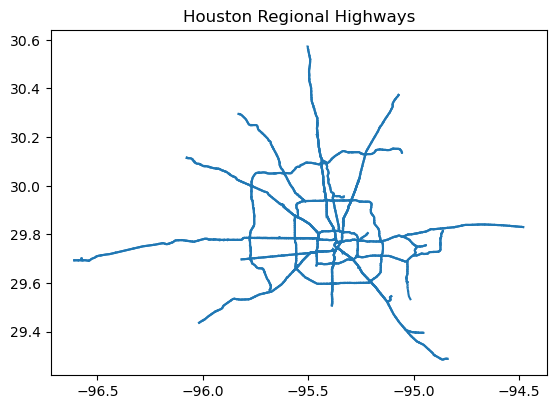

In [48]:
# Read and plot the highways shapefile
gdf_highways = gpd.read_file(file_path_highways)
gdf_highways.plot()
plt.title("Houston Regional Highways")
plt.show()

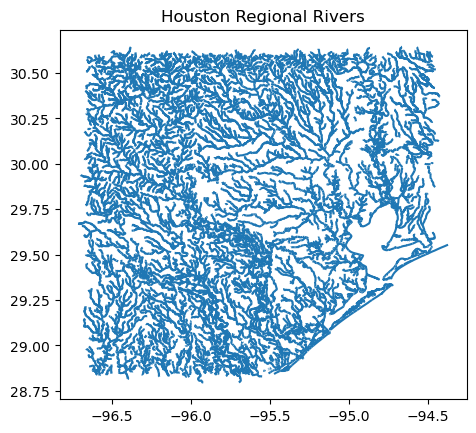

In [50]:
# Read and plot the rivers shapefile
gdf_rivers = gpd.read_file(file_Path_rivers)
gdf_rivers.plot()
plt.title("Houston Regional Rivers")
plt.show()

### Saving the tiff that we were previously plotting

In [51]:
# Reading tiff file
with rasterio.open('reprojected.tif') as reprojected:
    img = reprojected.read(1)

# Path to folder where files will be saved
path_to_folder_geographix = "../data/output_files_for_geographix/"

# File names
tif_filename = "Houston_regional_DEM.tif"

new_tiff_path = os.path.join(path_to_folder_geographix, tif_filename )


# Open and read the reprojected and clipped TIFF file using Rasterio
with rasterio.open('reprojected.tif') as reprojected:
    img = reprojected.read(1)
    profile = reprojected.profile

# Save the TIFF file to the new folder
with rasterio.open(new_tiff_path, 'w', **profile) as dst:
    dst.write(img, 1)

print("TIFF file saved to:", new_tiff_path)
print("Raster image shape:", img.shape)

TIFF file saved to: ../data/output_files_for_geographix/Houston_regional_DEM.tif
Raster image shape: (18886, 23431)
